<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A/6205A2MNISTdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Goals
>Data Preprocessing 

>Pipeline

>Hyperparameter Tuning

SVM with linear kernel and 'rbf' kernel

We will make model for the handwritten digit recognition through SVM. We will use two different models linear and rbf. RBF has two hyperparameters. C and Gamma. We will use GridSearchCV and RandomSearchCV to find the best hyperparameters.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer


## Import data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

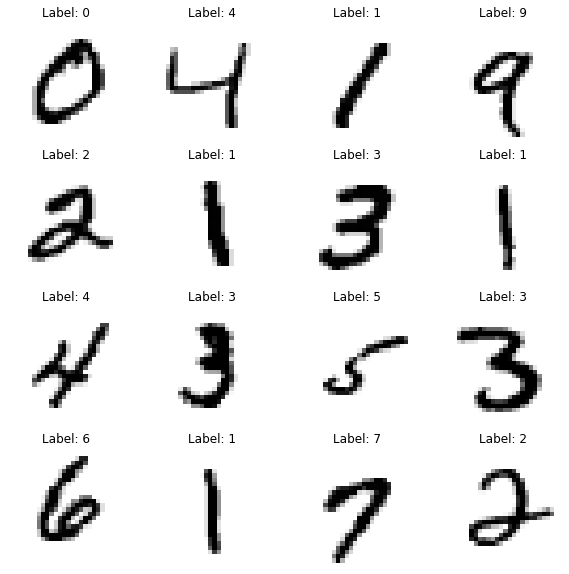

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,17):
  plt.subplot(4,4,i)
  X_im = np.reshape(mnist.data[i,],[28,28])
  plt.imshow(X_im, cmap=plt.cm.gray_r)
  plt.axis('off')
  plt.title('Label: {}'.format(mnist.target[i]))

We will work with only 10% of the whole data to reduce time in training.

In [ ]:
data = mnist.data

In [ ]:
data = data[0:7000]

In [ ]:
target = mnist.target

In [ ]:
target = target[0:7000]

In [ ]:
data.shape

(7000, 784)

In [ ]:
target.shape

(7000,)

**We check that each label is reasonably represented in the data when we look at a subset of the data.**

In [ ]:
values, counts = np.unique(target, return_counts=True)

In [ ]:
values

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
counts

array([691, 784, 675, 716, 716, 610, 709, 754, 650, 695])

## Modelling the data

In [ ]:
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, 
                                                    shuffle=True)

We will measure the time taken in fitting different models.

In [ ]:
svm_digit = svm.SVC(kernel='linear')
%time svm_digit.fit(X_train, y_train)

CPU times: user 7.7 s, sys: 6 ms, total: 7.7 s
Wall time: 7.74 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_digit.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.9178571428571428


In [ ]:
svm_digit = svm.SVC(kernel='rbf')
%time fit_rbf = svm_digit.fit(X_train, y_train)

CPU times: user 14.5 s, sys: 5 ms, total: 14.5 s
Wall time: 14.6 s


In [ ]:
fit_rbf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
fit_rbf._gamma

2.042974231835564e-07

By default we have C = 1 and gamma ~ 2.0709057645274015e-07

In [ ]:
 y_pred = svm_digit.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.9635714285714285


# Grid Search for best parameters

We will do grid search on a parameter space influcened by the good performance on deafault parameteres.

In [ ]:
parameters = {'C':[1, 10, 100,1000], 'gamma': [1e-3,1e-4, 1e-5,1e-6,1e-7,1e-8] }

## Recall score

We calculated other scores but will skip in the final run to save time.

In [ ]:
#clf = GridSearchCV(SVC(kernel='rbf'), parameters, scoring='recall_macro')

In [ ]:
#%time clf.fit(X_train,y_train)
#print(clf.best_params_)

CPU times: user 58min 25s, sys: 703 ms, total: 58min 26s
Wall time: 58min 36s
{'C': 100, 'gamma': 1e-07}
clf.best_score_

0.9537723158869695

In [ ]:
#clf.best_score_

In [ ]:
#y_pred = clf.predict(X_test)

#acc = accuracy_score(y_test, y_pred)
#print("Accuracy on the test dataset: {}".format(acc))

## Precision Score

In [ ]:
#clf2 = GridSearchCV(SVC(kernel='rbf'), parameters, scoring='precision_macro')

In [ ]:
#%time clf2.fit(X_train,y_train)
#print(clf2.best_params_)

In [ ]:
#clf2.best_score_

In [ ]:
#y_pred = clf2.predict(X_test)

#acc = accuracy_score(y_test, y_pred)
#print("Accuracy on the test dataset: {}".format(acc))

## Accuracy score

In [ ]:
sc = make_scorer(accuracy_score)

In [ ]:
clf3 = GridSearchCV(SVC(kernel='rbf'), parameters, scoring=sc)

In [ ]:
%time clf3.fit(X_train,y_train)
print(clf3.best_params_)

CPU times: user 1h 18min 36s, sys: 832 ms, total: 1h 18min 37s
Wall time: 1h 18min 49s
{'C': 10, 'gamma': 1e-07}


CPU times: user 1h 18min 36s, sys: 832 ms, total: 1h 18min 37s
Wall time: 1h 18min 49s
{'C': 10, 'gamma': 1e-07}

In [ ]:
clf3.best_score_

0.9571428571428571


clf3.best_score_

0.9571428571428571

In [ ]:
y_pred = clf3.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.965


Accuracy on the test dataset: 0.965

# Random Search for the parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import scipy

We first do a random search on same parameter space

In [ ]:
clf = RandomizedSearchCV(SVC(), parameters, random_state=0)

In [ ]:
%time clf.fit(X_train,y_train)

CPU times: user 27min 22s, sys: 269 ms, total: 27min 22s
Wall time: 27min 27s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': [0.001, 0.0001, 1e-05, 1e-06,
                                                  1e-07, 1e-08]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'C': 10, 'gamma': 1e-07}

In [ ]:
clf.best_score_

0.9571428571428571

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.965


We try a different parameter space for the random search

In [ ]:
from sklearn.utils.fixes import loguniform
para = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-8, 1e-2),
 'kernel': ['rbf'],
 'class_weight':['balanced', None]}
clf = RandomizedSearchCV(SVC(), para, random_state=0)

In [ ]:
%time clf.fit(X_train,y_train)

CPU times: user 36min 1s, sys: 460 ms, total: 36min 2s
Wall time: 36min 7s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb6cd723b38>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb6cd723cc0>,
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
               

In [ ]:
clf.best_params_

{'C': 86.63279761354555,
 'class_weight': 'balanced',
 'gamma': 6.098283908236053e-07,
 'kernel': 'rbf'}

In [ ]:
clf.best_score_

0.9603571428571429

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.9771428571428571


# Conclusion

a) The model was trained with linera kerenl with default C = 1 with an accuracy of **0.9178571428571428** taking Wall time: **7.74 s**

b) The RBF kernel performed better. It had better accuracy of **0.9635714285714285**

c) The default hyperparameters were C = 1 and gamma = 'scale' i.e.  it is calculated by gamma = 1 / (n_features * X.var()). Here the gamma is **2.042974231835564e-07**

## d) Accuracy

The grid search and random search found following as the best parameters with cross-validation. The random search on same parameter space found the same parameters as gridsearch much quicker. On a bigger space it found better parameters in almost half the time compared to GridSearchCV.

The parameter found on a given space need not be better than the default ones as we can see it in this case. It is important that prameter space searched in is big as well as dense enough. But since Grid search can take a lot of time with a dense space. A random search on a bigger and denser parameter space is the most optimal way to go.

**Grid search**: 

{'C': 10, 'gamma': 1e-07}

Best score on training CV: 0.9571428571428571

**Accuracy** on the test dataset: **0.965**


**Random Search on same parameter space:** 

'C': 10, 'gamma': 1e-07}

Best score on training CV: 0.9571428571428571

**Accuracy** on the test dataset:**0.965**

**Random Search on larger parameter space:** 

{'C': 86.63279761354555,
 'class_weight': 'balanced',
 'gamma': 6.098283908236053e-07,
 'kernel': 'rbf'}

 Best score on training CV: 0.9603571428571429

 **Accuracy** on the test dataset: **0.9771428571428571**

The random search on a bigger parameter space gave the best accuracy.

## e) Computational time

 In general the search of parameters is an expansive operation. The time difference between Grid search and Random search was significant on same parameter space. 

**Grid search**: 
Wall time: 1h 18min 49s

**Random Search on same parameter space:** 


Wall time: 27min 27s

**Random Search on larger parameter space:** 


Wall time: 36min 7s

The random search on a bigger parameter space is optimal in terms of computational time and gave a much significant improvement in the accuracy.

# Appendix

##Data Standadization


For SVM and similar models, it is key that you standadridise the data so that the magnitude of variance in each feature is in the same range otherwise some of the features would influence more than others.

We can use the StandardScaler(). In this data the fetures represnts pixels which are in same range so it is not necessary. Though in the documentation it is metioned this:
>For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are **centered around zero** and have variance in the same order.

It is not very clear if and where they are assuming the data to be centred at zero, in addition to that variance is unit. We posted a question on Stackexchange ( [here](https://datascience.stackexchange.com/questions/88919/preprocessing-standardscaler-do-we-really-need-mean-to-be-zero/89039?noredirect=1#comment93244_89039)) but haven't received a satisfactory answer though. 

## Cross Validation
Alternative to Grid Search

Since we saw that a search through the parameter space is quite expensive, another quicker way to find good parameters is to pivoting the default parameters and using cross-validation to ensure it is not an overfitting choice.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
svm_digit = svm.SVC(kernel='rbf', C = 86.63279761354555, gamma=6.098283908236053e-07, class_weight='balanced') #C = 86.63279761354555 ,'class_weight'= 'balanced')

In [ ]:
%time fit_rbf = svm_digit.fit(X_train, y_train)

CPU times: user 36.1 s, sys: 12 ms, total: 36.1 s
Wall time: 36.2 s


In [ ]:
scores = cross_val_score(svm_digit, X_train, y_train, cv=5)
scores

array([0.96160714, 0.96071429, 0.9625    , 0.96160714, 0.95535714])

In [ ]:
 y_pred = svm_digit.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset: {}".format(acc))

Accuracy on the test dataset: 0.9771428571428571


## Pipeline

In case, we want to pre-process the data before fitting, we can construct a pipeline to do them together.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import make_pipeline # Here we see that making standard data has no benefit really, since the data was already in the similar range for each feature, no point in making it in floating point.
clf = make_pipeline(StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X_train, y_train, cv=5)